<a href="https://colab.research.google.com/github/AryKau33/Projects/blob/main/Diabetes-Risk-Predictor-Using-Ensemble-Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
import numpy as np
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
import numpy as np
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
import seaborn as sns

In [4]:
data = pd.read_csv("dataset.csv")

In [5]:
data.shape

(20758, 18)

In [6]:
data.isnull().any()

,0
id,False
Gender,False
Age,False
Height,False
Weight,False
family_history_with_overweight,False
FAVC,False
FCVC,False
NCP,False
CAEC,False


In [7]:
data.info()
data.describe()
data.isnull().sum()
data['NObeyesdad'].value_counts() #NObeyesdada is the nutritional obesity diagnosis based on their features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

,count
NObeyesdad,
Obesity_Type_III,4046
Obesity_Type_II,3248
Normal_Weight,3082
Obesity_Type_I,2910
Insufficient_Weight,2523
Overweight_Level_II,2522
Overweight_Level_I,2427


In [8]:
data.drop('id',axis = 1,inplace = True)

In [9]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
            'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col]) #preprocessing the data to convert strings to values that the algorithm can understand

In [10]:
X = data.drop('NObeyesdad',axis = 1)
y = data['NObeyesdad']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 40,stratify = y) #nobeyes has normal,overwt, obese, stratify makes sure we have equal proportions of the 3 in training set

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
rf = RandomForestClassifier(random_state = 40)
gb = GradientBoostingClassifier(random_state = 40)
xgb = XGBClassifier(random_state = 40,eval_metric = 'mlogloss')#multilog loss useful for multiple-class classification
lgbm = LGBMClassifier(random_state = 40)

In [14]:
ensemble = VotingClassifier(estimators = [('rf',rf),('gb',gb),('xgb',xgb),('lgbm',lgbm)],voting = 'soft') #the soft allows us to take average of all the models
ensemble.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 16
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Info] Start training from score -1.907572
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.855022
[LightGBM] [Info] Start training from score -1.635117
[LightGBM] [Info] Start training from score -2.146046
[LightGBM] [Info] Start training from score -2.107657


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=40)),
                             ('gb',
                              GradientBoostingClassifier(random_state=40)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feat...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=40, ...)),
                             ('lgbm', LGBMClassifier(random_state=40))],
                 voting='soft')

In [15]:
from sklearn.metrics import classification_report
predy = ensemble.predict(X_test)
print(classification_report(y_test,predy))
print(accuracy_score(y_test,predy))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       505
           1       0.90      0.90      0.90       617
           2       0.90      0.90      0.90       582
           3       0.97      0.98      0.97       650
           4       1.00      1.00      1.00       809
           5       0.85      0.79      0.82       485
           6       0.80      0.83      0.82       504

    accuracy                           0.92      4152
   macro avg       0.91      0.91      0.91      4152
weighted avg       0.92      0.92      0.92      4152

0.9157032755298651


In [16]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(ensemble,X,y,cv = 5)
print(score)
print(score.mean())  #5-fold cross-validation

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2043
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 16
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Info] Start training from score -1.907167
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.855022
[LightGBM] [Info] Start training from score -1.635117
[LightGBM] [Info] Start training from score -2.146046
[LightGBM] [Info] Start training from score -2.108153
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2045
[LightGBM

In [17]:
ensemble.fit(X_train,y_train)
predy = ensemble.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 16
[LightGBM] [Info] Start training from score -2.107657
[LightGBM] [Info] Start training from score -1.907572
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.855022
[LightGBM] [Info] Start training from score -1.635117
[LightGBM] [Info] Start training from score -2.146046
[LightGBM] [Info] Start training from score -2.107657


[[474  26   0   0   0   5   0]
 [ 29 558   1   0   0  24   5]
 [  0   1 523  19   3   3  33]
 [  0   0  10 637   0   1   2]
 [  0   0   1   1 806   1   0]
 [  1  30   7   0   0 384  63]
 [  0   7  40   2   0  35 420]]


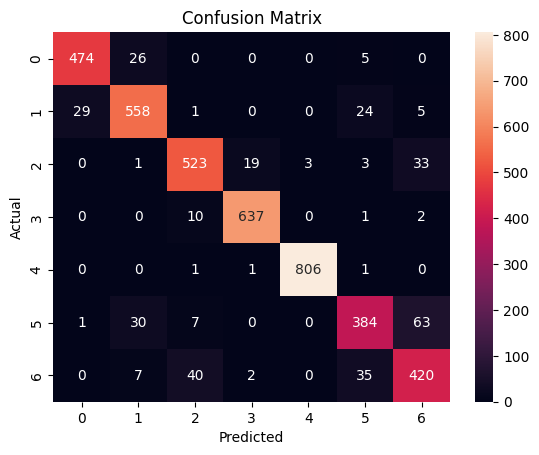

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,predy)
print(cm)
sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()